<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>

<hr>


# Instructions


elow, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score



# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [12]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
#you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['numpy'])


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [4]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [5]:
# path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [254]:
# await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [255]:
df = pd.read_csv("Weather_Data.csv")
df.head()

Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017.6       1017.4         8         8     20.7     20.9        Yes   
1       1017.9       1016.4         7         7     22.4     24.8        Yes   
2       1016.7       1015.6         7         8     23.5     23.0        Yes   
3       1014.2       1011.8         8         8     21.4     20.9        Yes   
4       1008.3       1004.8         8         8     22.5     25.5        Yes   

   RainTomorrow  
0           Yes  
1           Yes  
2           Yes  
3           Yes  
4           Yes  

[5 rows x 22 columns]

In [256]:
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [257]:
null_counts = df.isnull().sum()
null_counts

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [258]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.head(5))

       Date WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0  2/1/2008           W          S        SSW       Yes          Yes
1  2/2/2008           W          W          E       Yes          Yes
2  2/3/2008           W        ESE        ESE       Yes          Yes
3  2/4/2008           W        NNE          E       Yes          Yes
4  2/5/2008           W        NNE          W       Yes          Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [259]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [260]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

In [261]:
df_sydney_processed['RainTomorrow'].value_counts()

0    2422
1     849
Name: RainTomorrow, dtype: int64

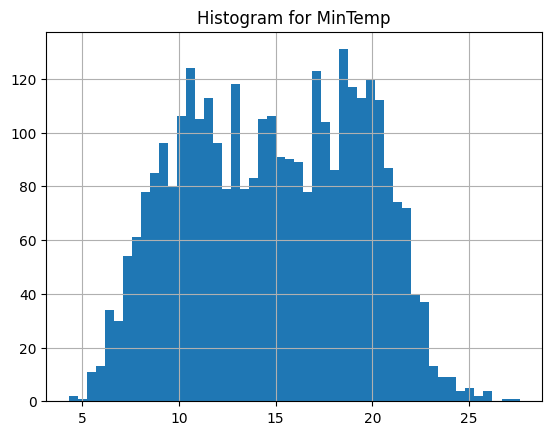

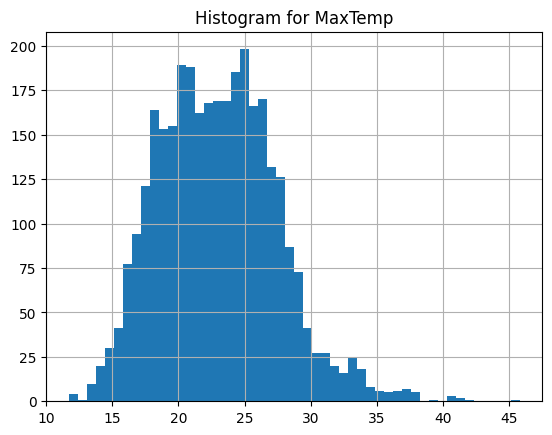

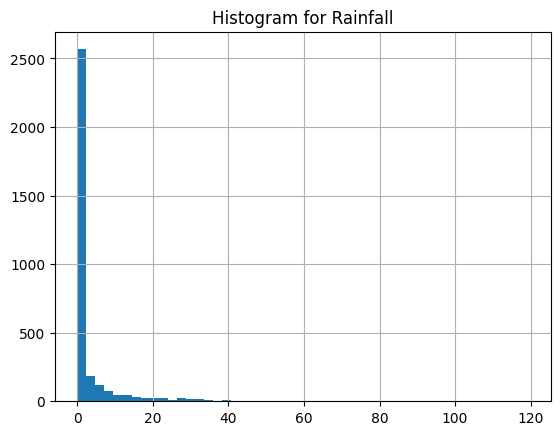

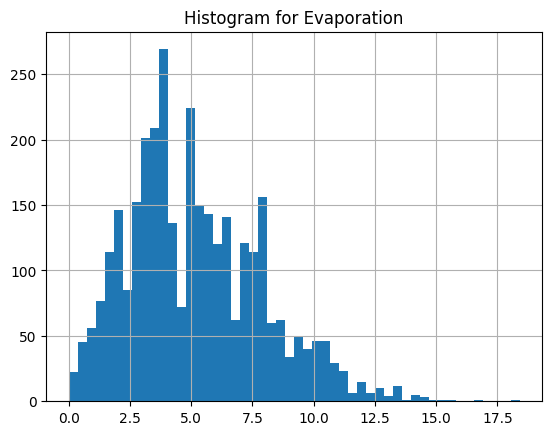

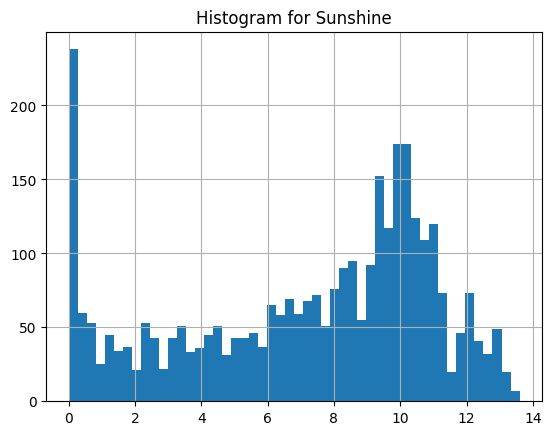

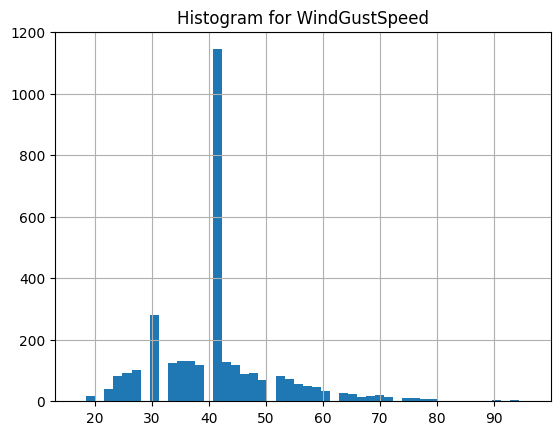

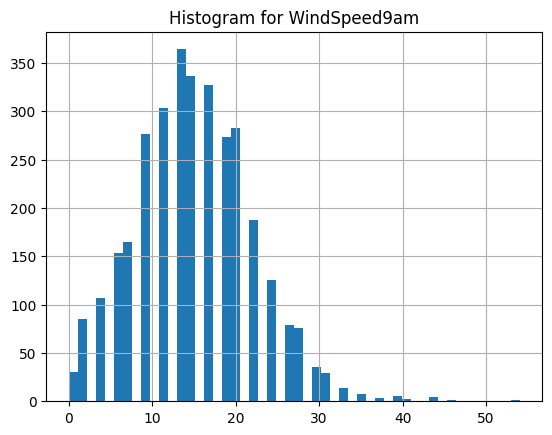

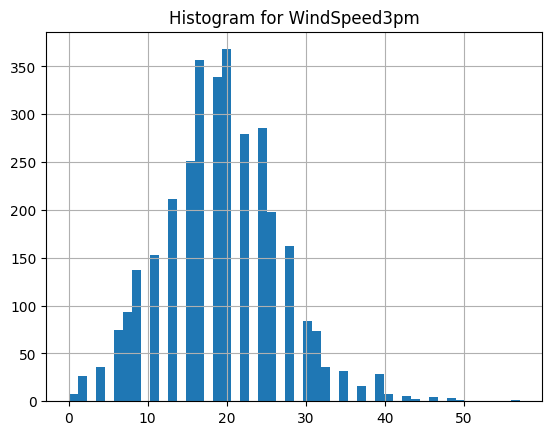

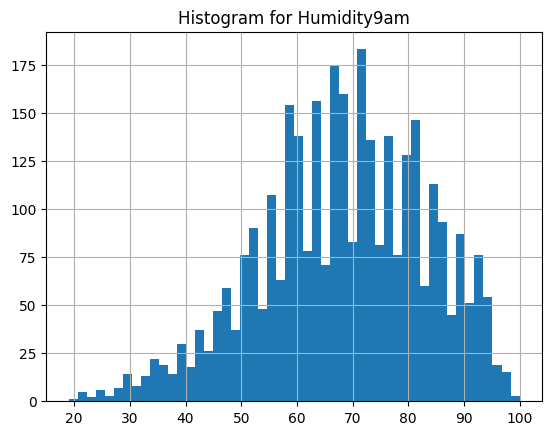

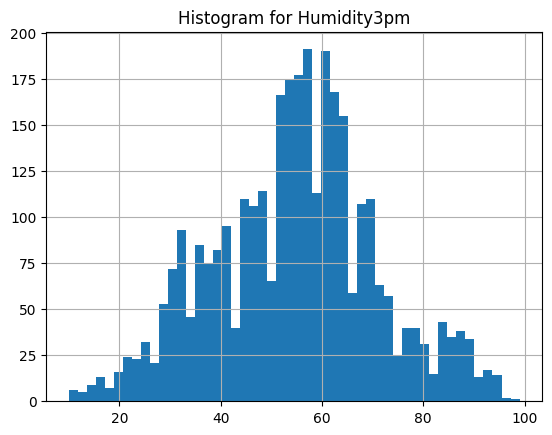

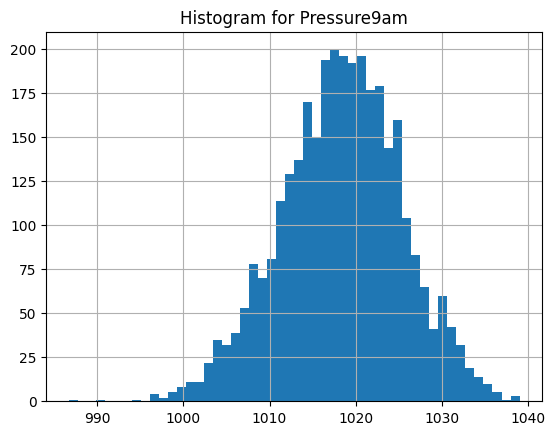

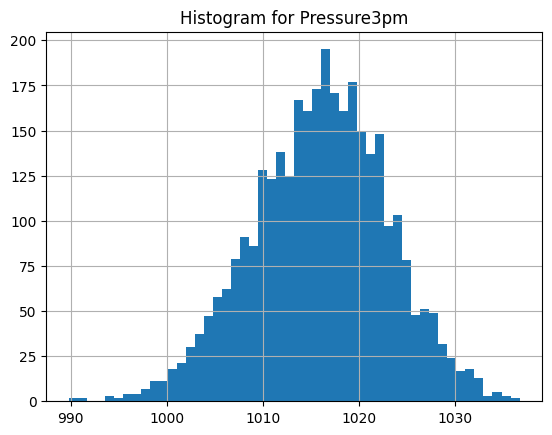

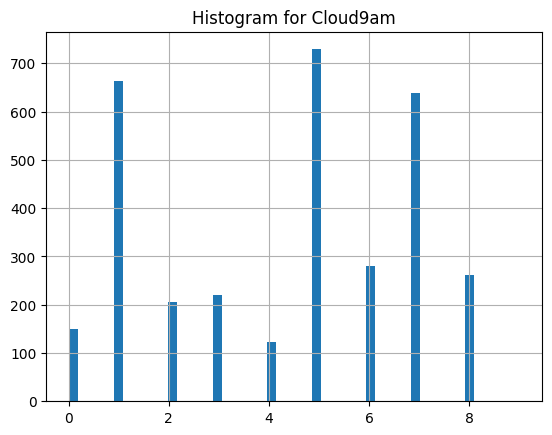

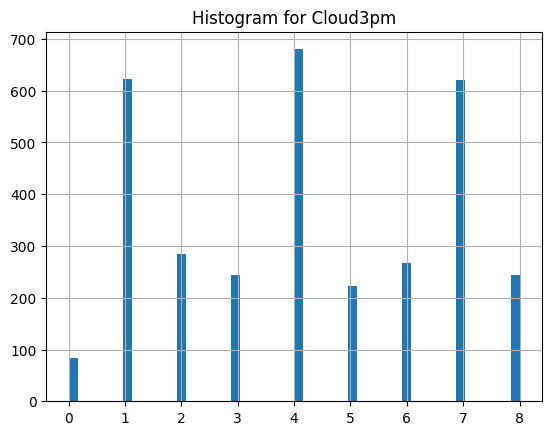

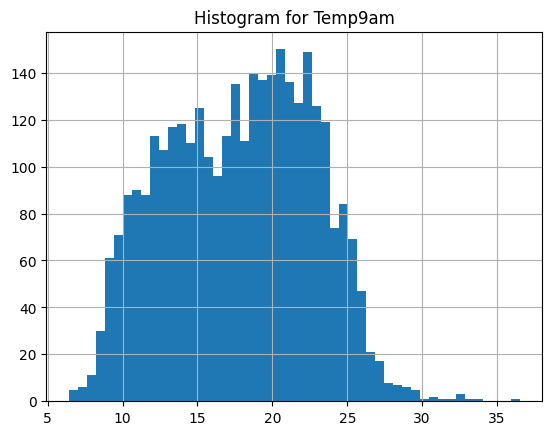

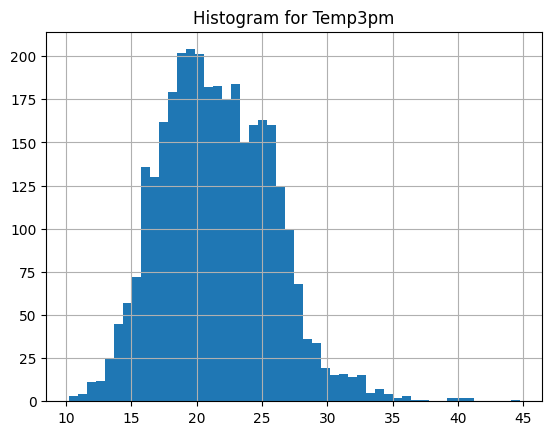

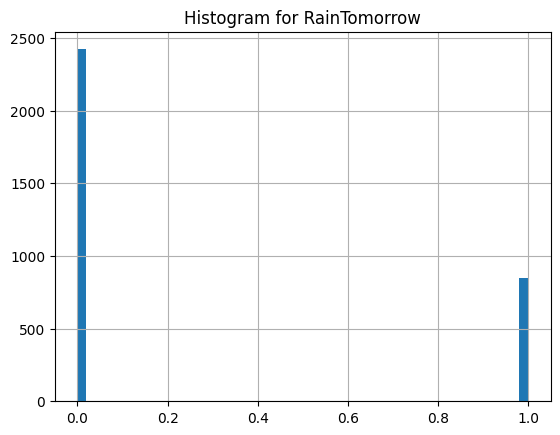

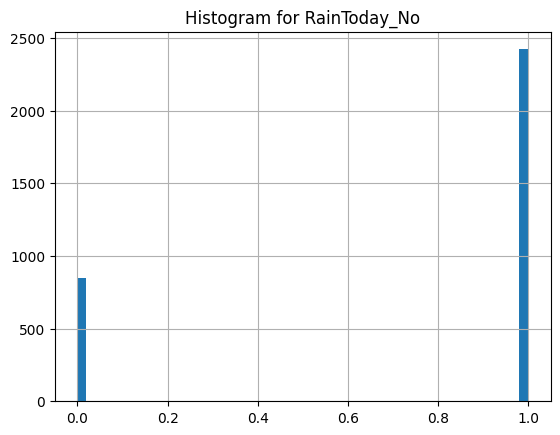

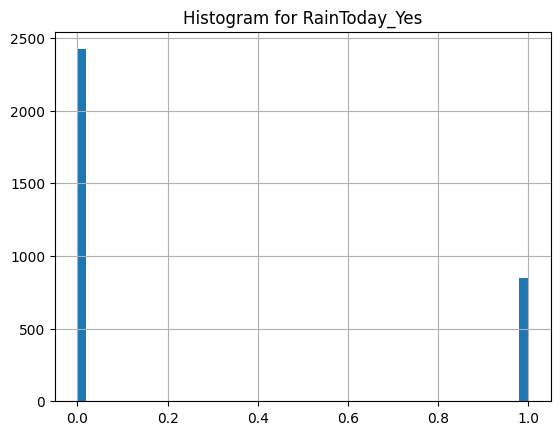

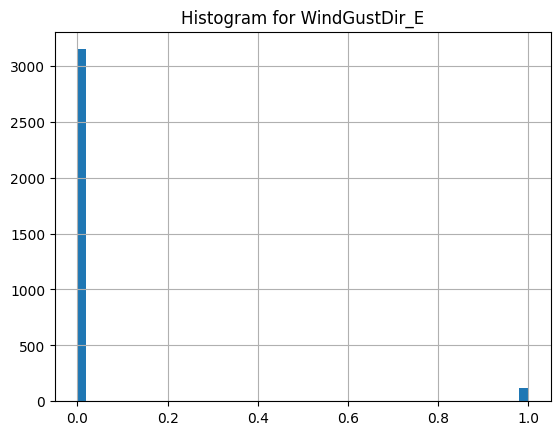

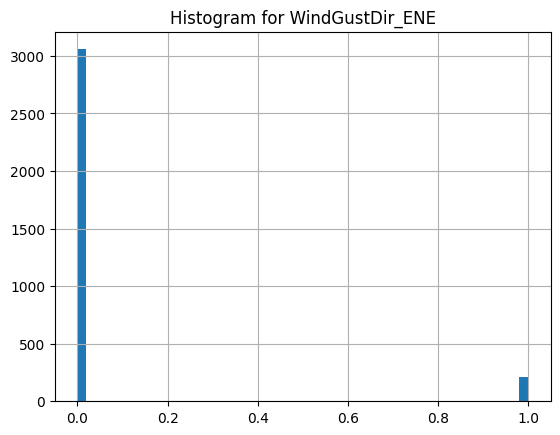

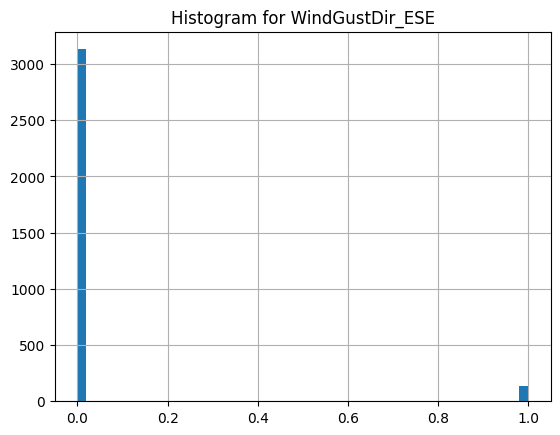

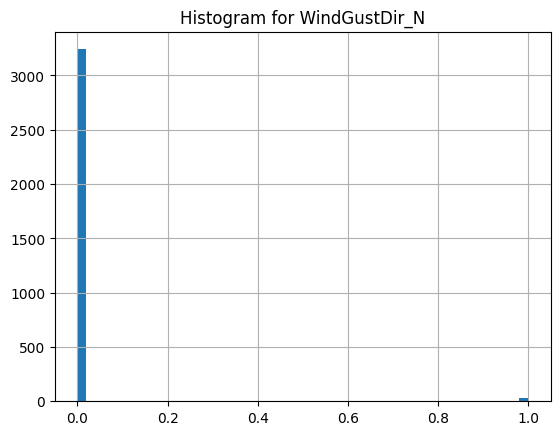

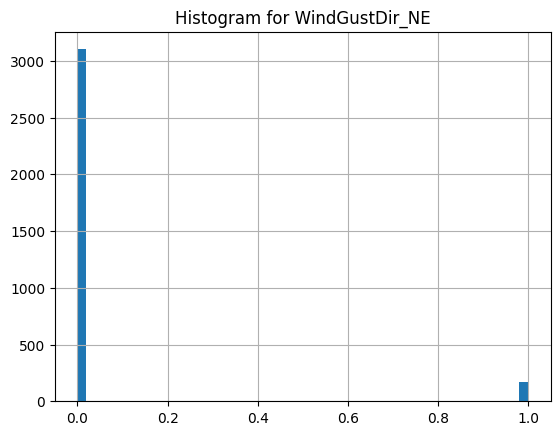

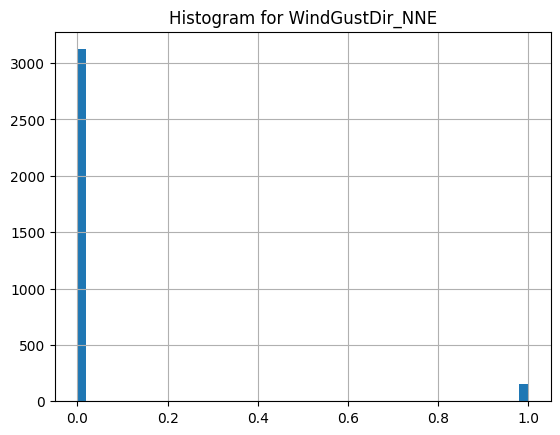

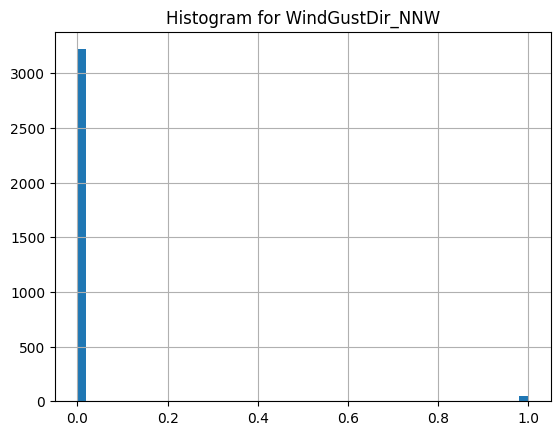

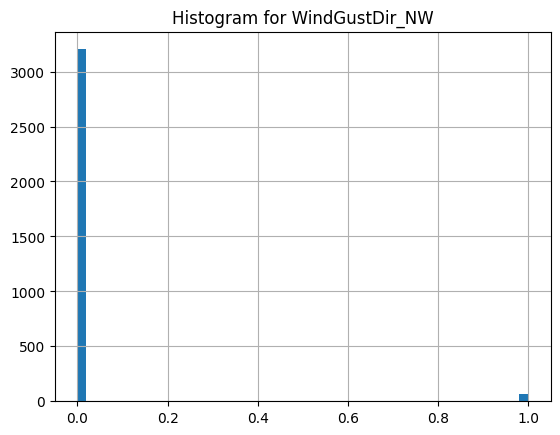

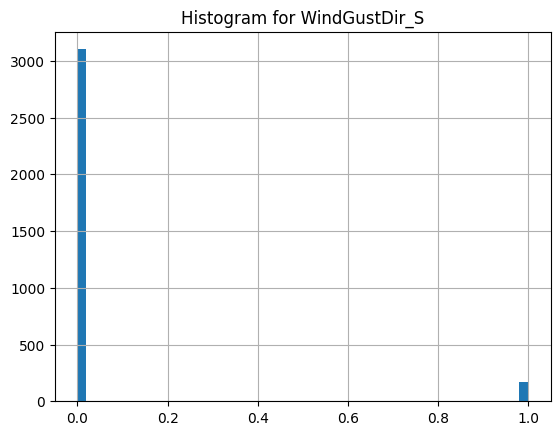

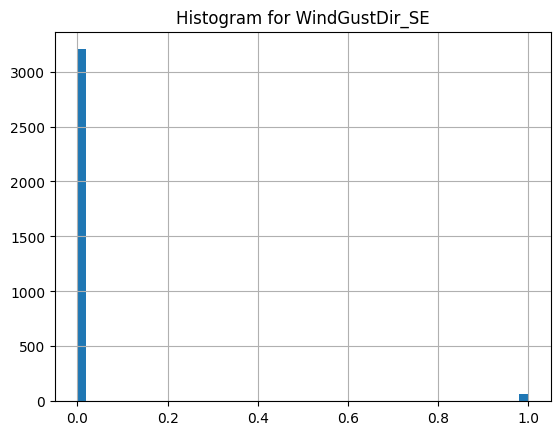

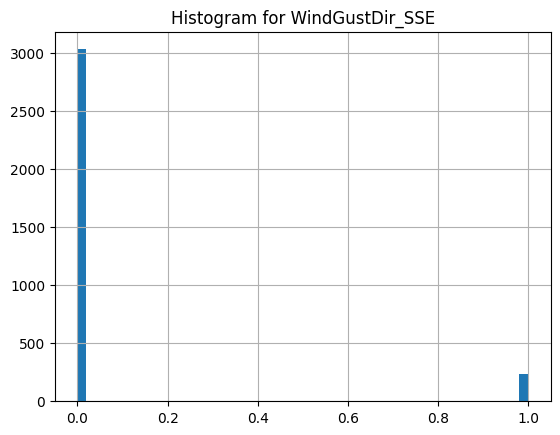

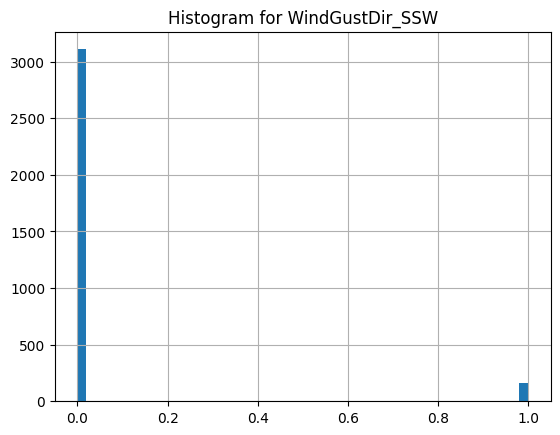

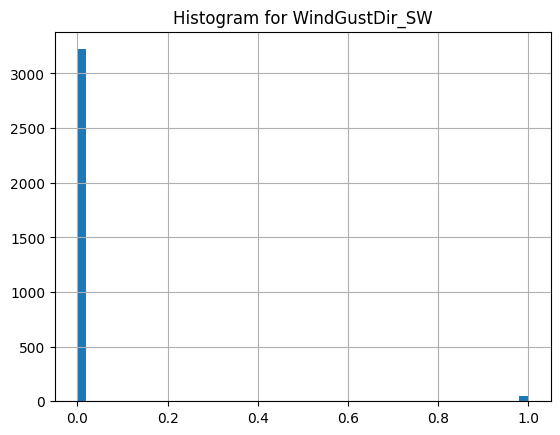

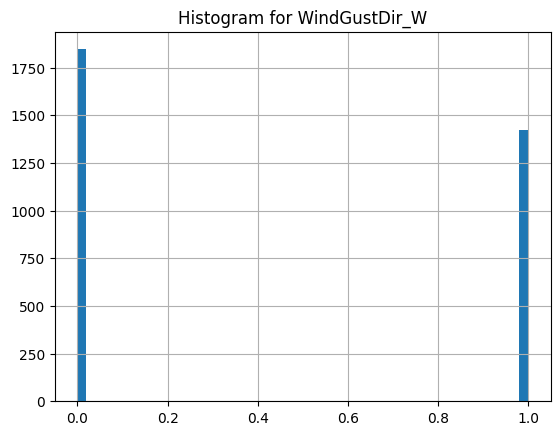

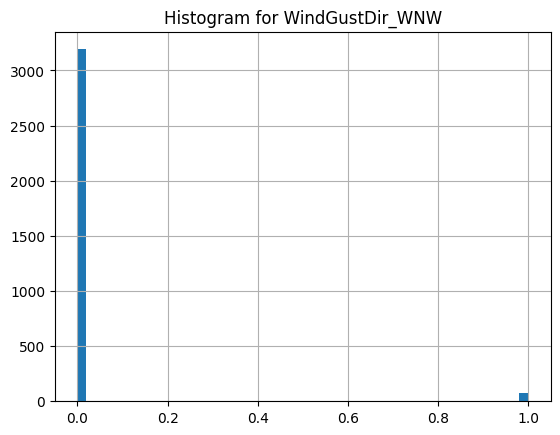

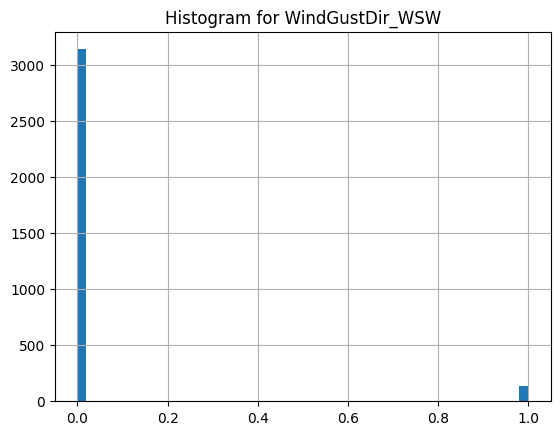

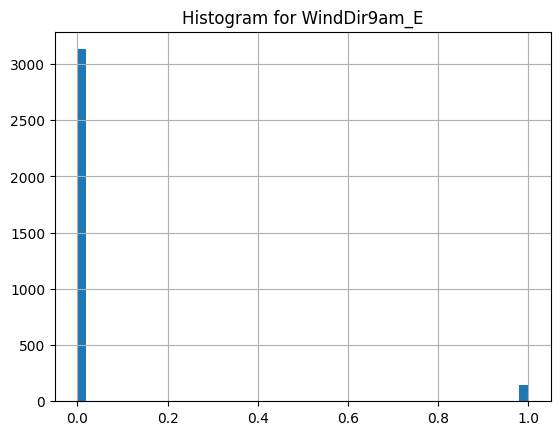

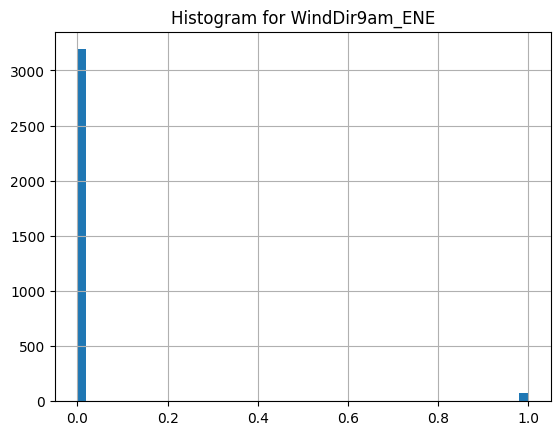

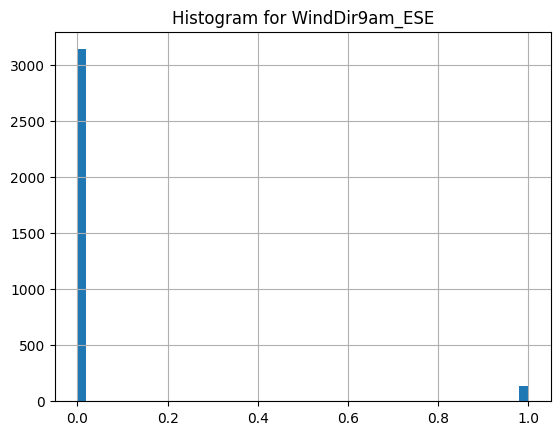

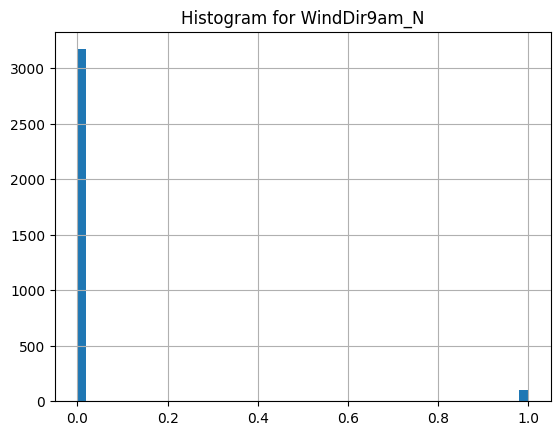

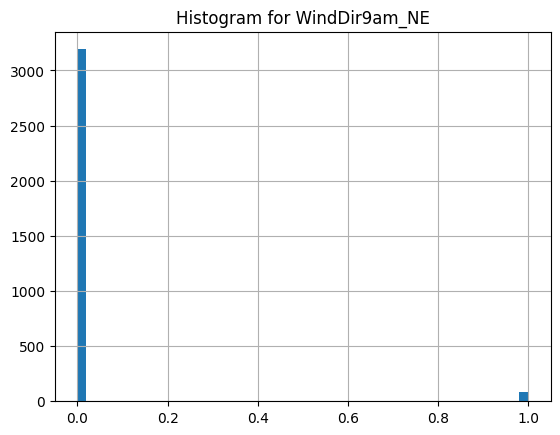

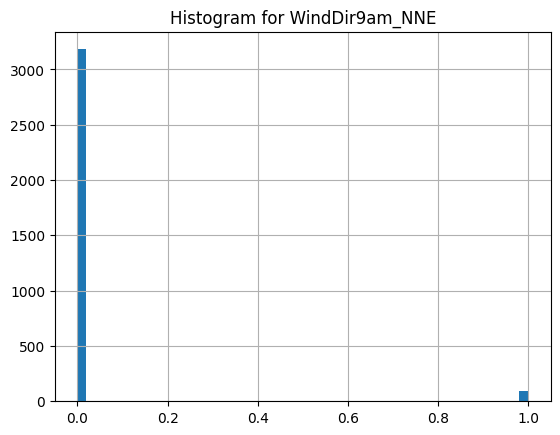

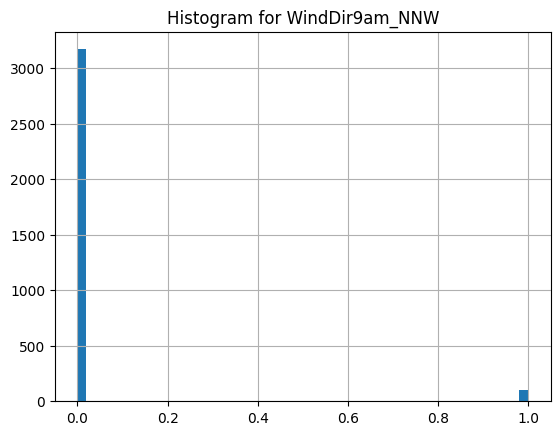

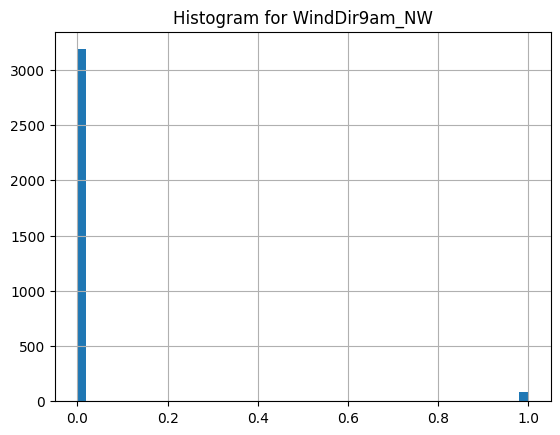

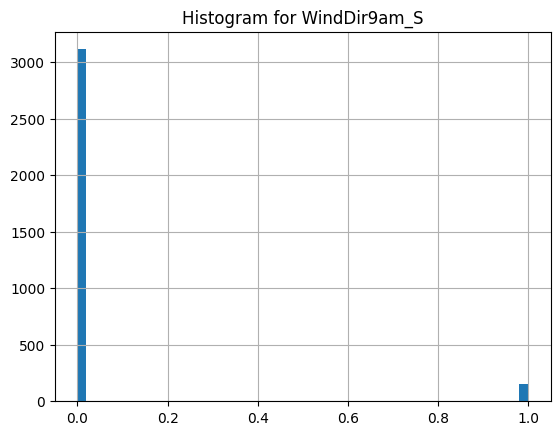

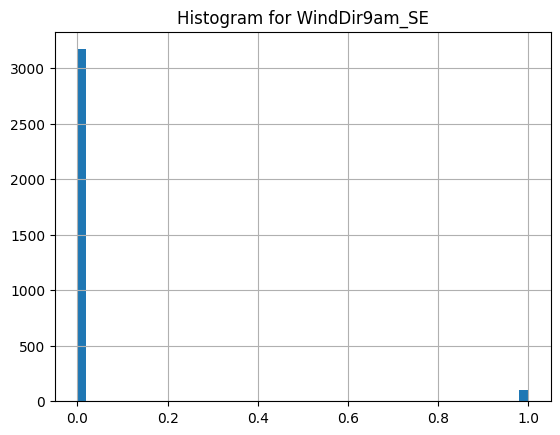

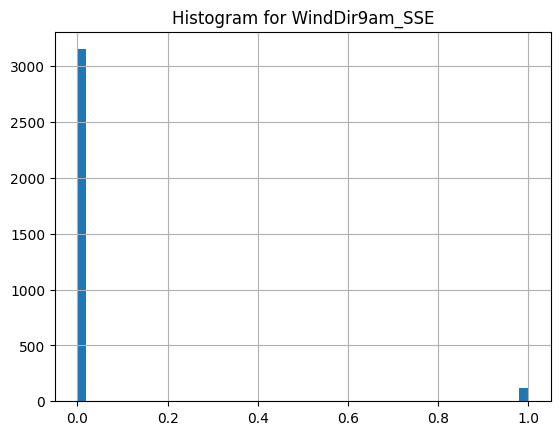

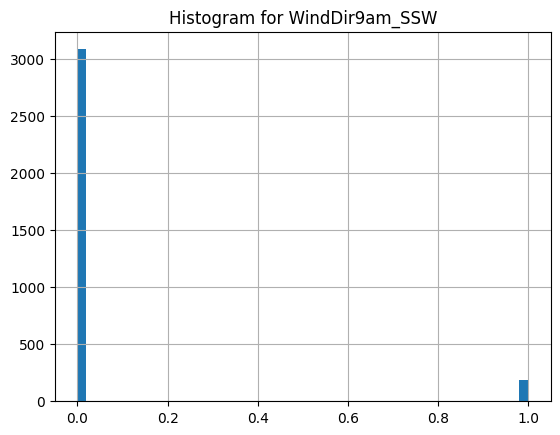

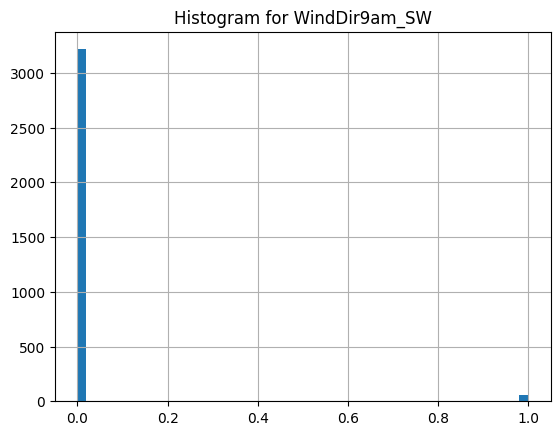

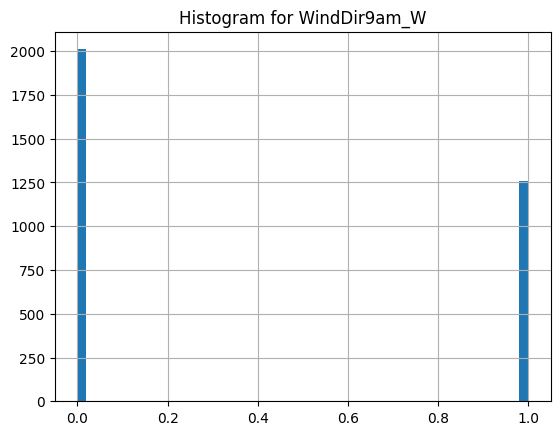

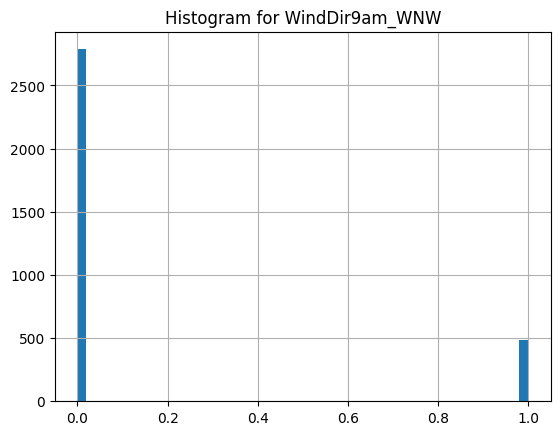

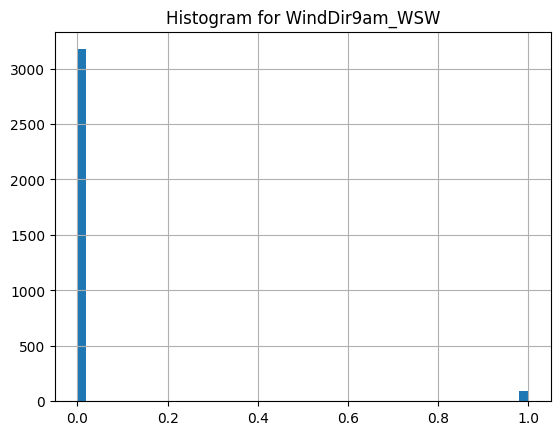

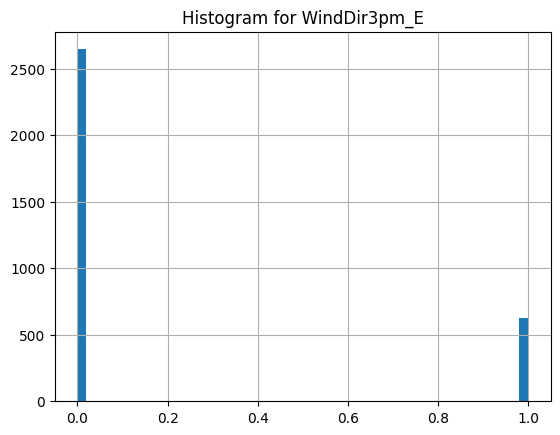

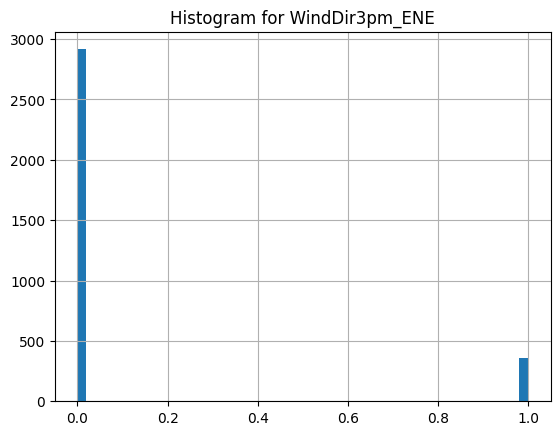

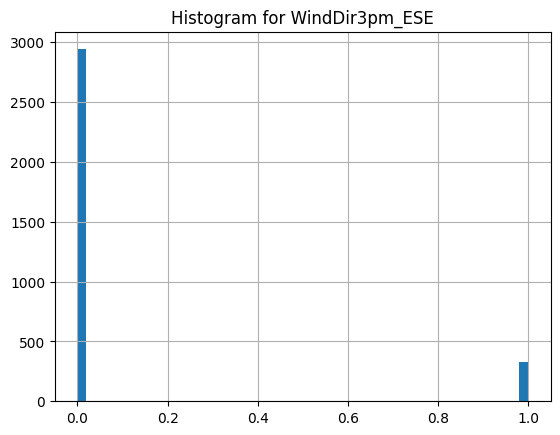

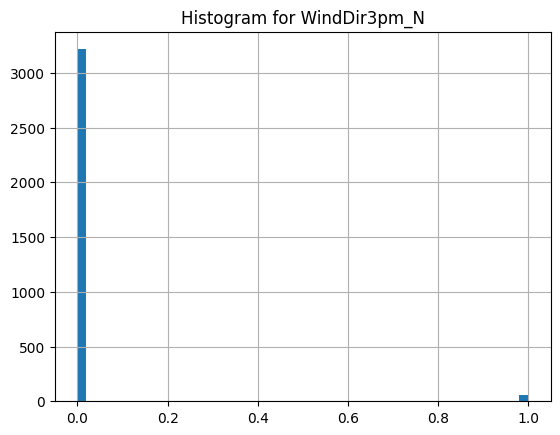

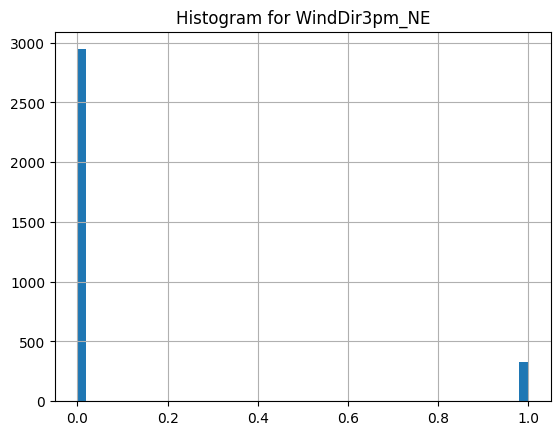

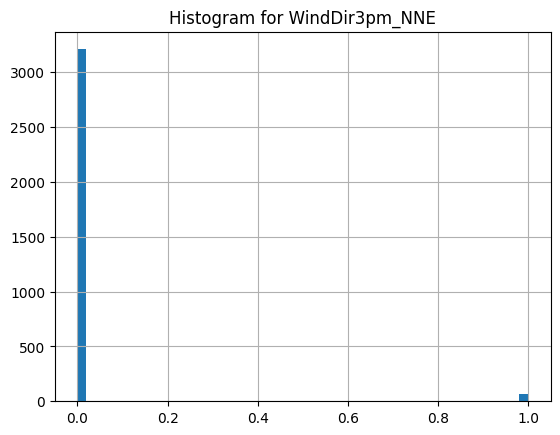

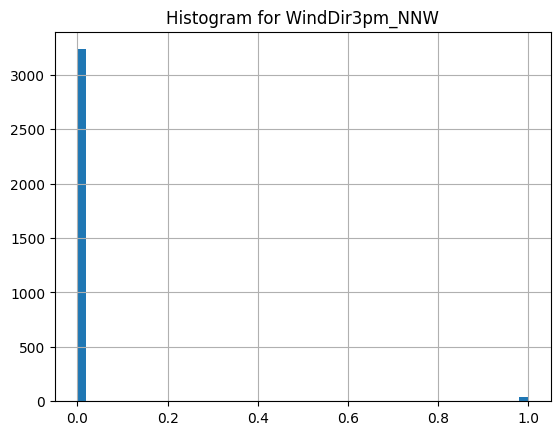

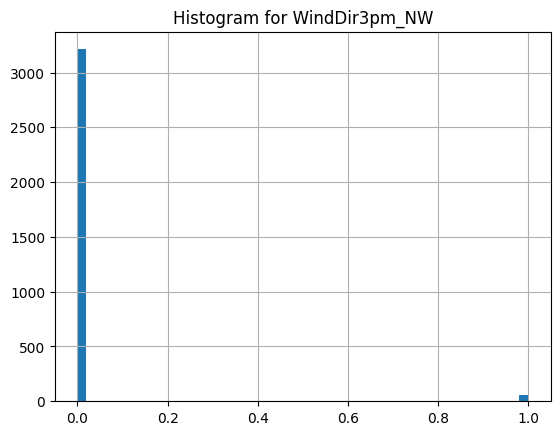

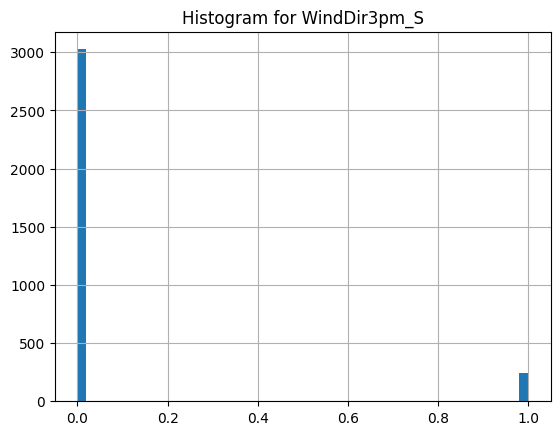

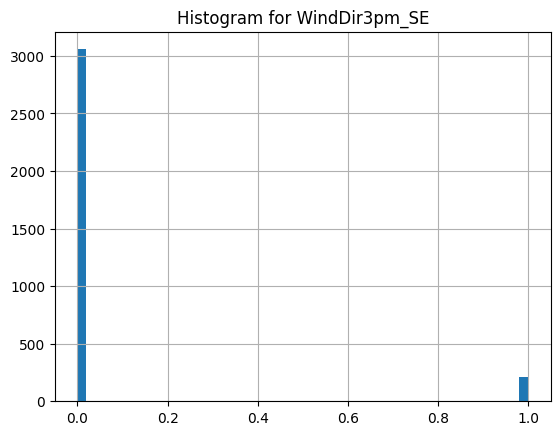

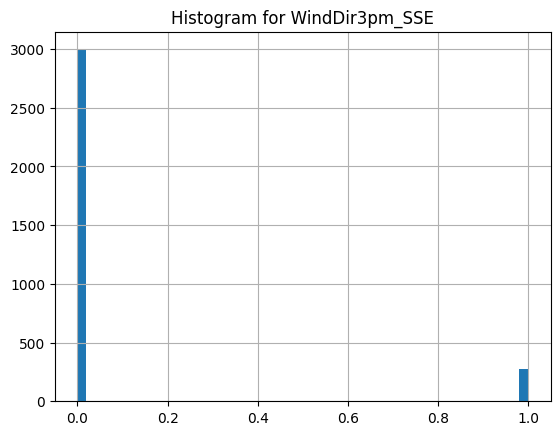

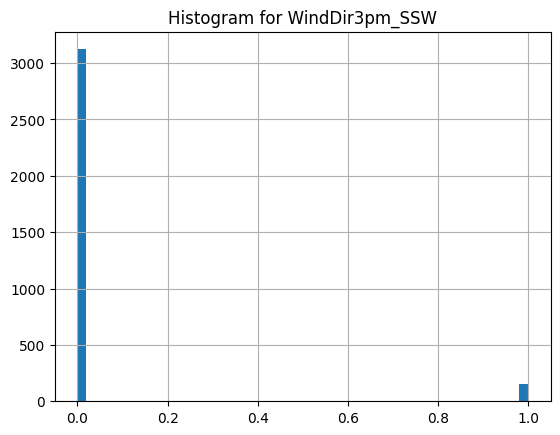

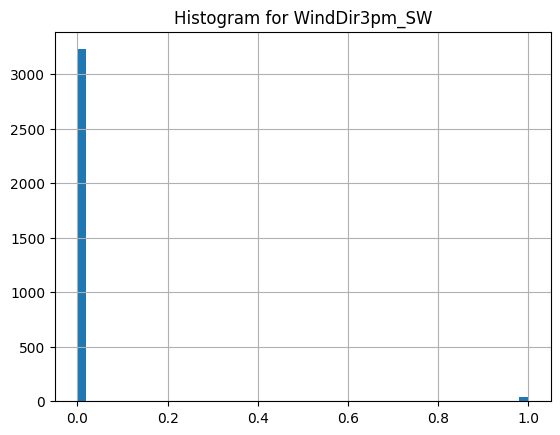

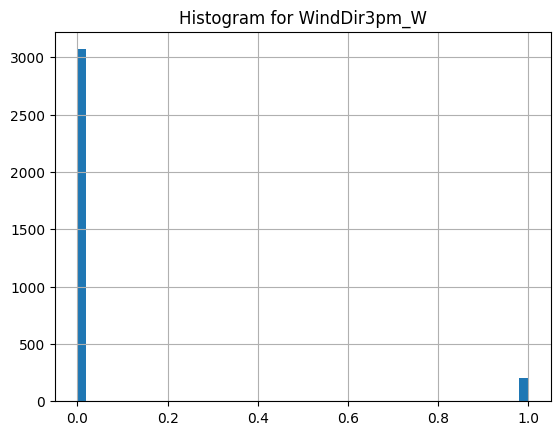

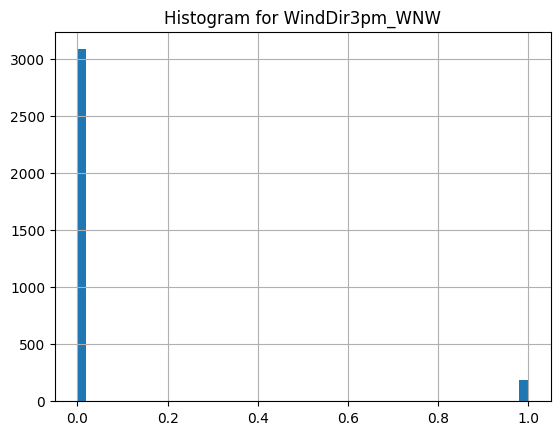

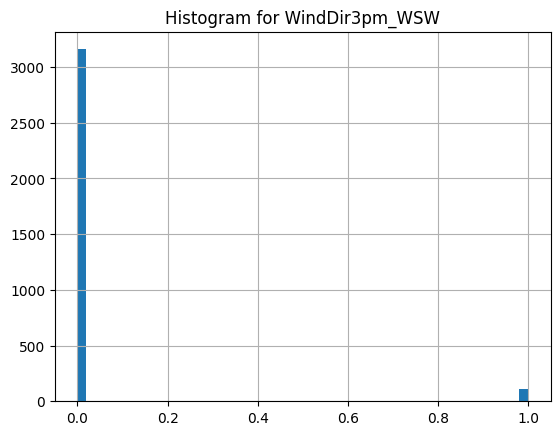

In [262]:
import matplotlib.pyplot as plt

for column in df_sydney_processed.columns:
    if df_sydney_processed[column].dtype != 'object':  
        df_sydney_processed.hist(column=column, bins=50)
        plt.title(f'Histogram for {column}')
plt.show()


### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [263]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [264]:
df_sydney_processed = df_sydney_processed.astype(float)

In [265]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

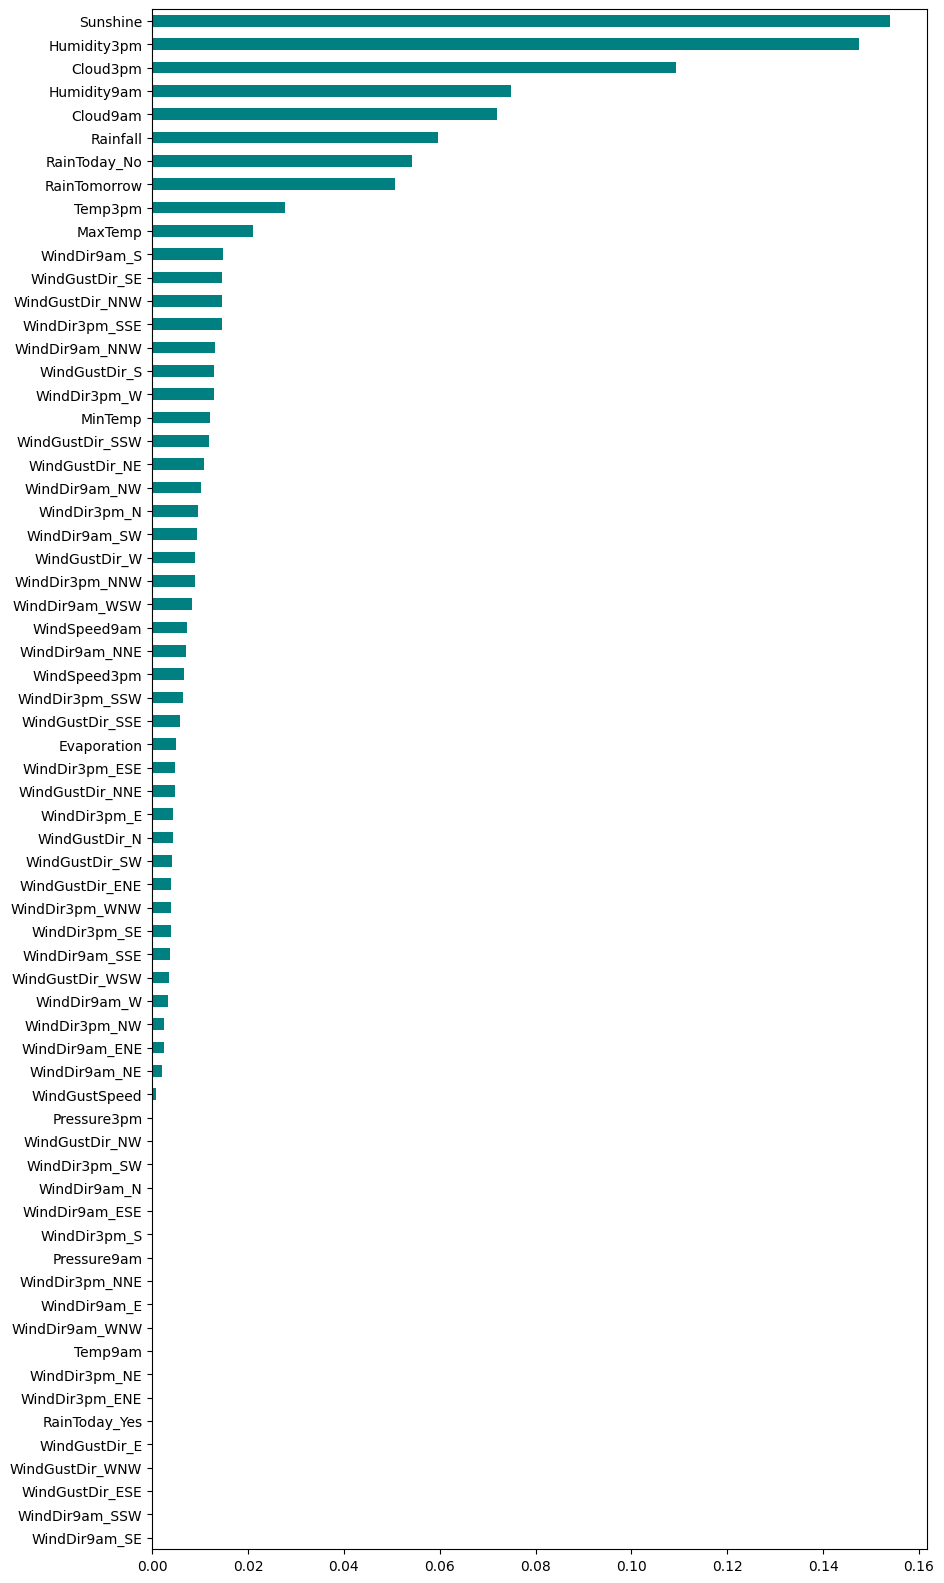

In [266]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(features, Y)
plt.figure(figsize=(10, 20))

feat_importances = pd.Series(importances, df_sydney_processed.columns[0:len(df_sydney_processed.columns)-1])
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

In [267]:
# features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [268]:
#Enter Your Code, Execute and take the Screenshot
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size =0.2, random_state = 10)

In [269]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2616, 66)
(655, 66)
(2616,)
(655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [270]:
#Enter Your Code, Execute and take the Screenshot

In [271]:
LinearReg = LinearRegression()
LinearReg

LinearRegression()

In [272]:
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [273]:
#Enter Your Code, Execute and take the Screenshot

In [274]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [275]:
#Enter Your Code, Execute and take the Screenshot

In [276]:
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score

LinearRegression_MAE = median_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [277]:
#Enter Your Code, Execute and take the Screenshot

In [278]:
Report = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value / Score': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
})

print(Report)

  Metric  Value / Score
0    MAE       0.188534
1    MSE       0.115720
2     R2       0.427134


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [279]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [455]:
k = 4
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [456]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [457]:
predictions = KNN.predict(x_test)

KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [458]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, predictions, cmap_, class_labels=None):
    cm = confusion_matrix(y_test, predictions)
    
    custom_cmap = plt.cm.get_cmap(cmap_) 

    if class_labels:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    else:
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot(cmap=custom_cmap)
    plt.show()

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [459]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [460]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [461]:
Report2 = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Score': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})

print(Report2)



           Metric     Score
0  Accuracy_Score  0.812214
1    JaccardIndex  0.394089
2        F1_Score  0.565371


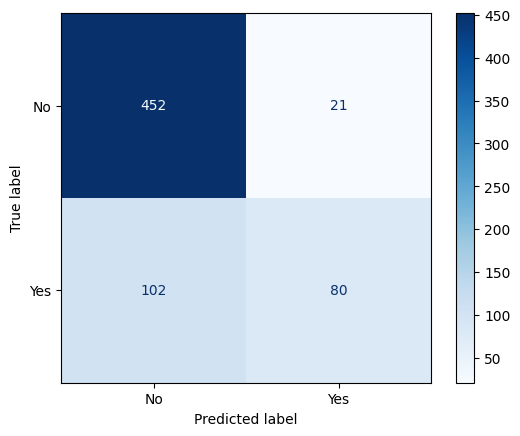

In [462]:
plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

For K :  1


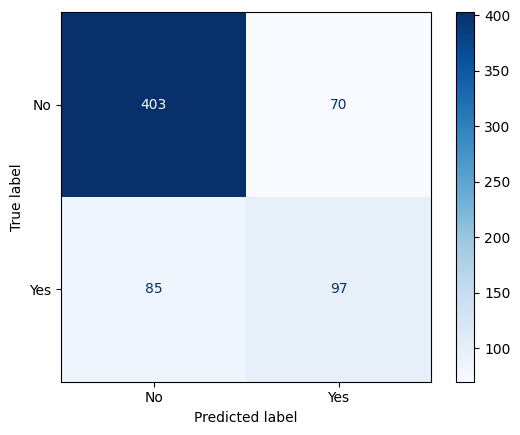

For K :  2


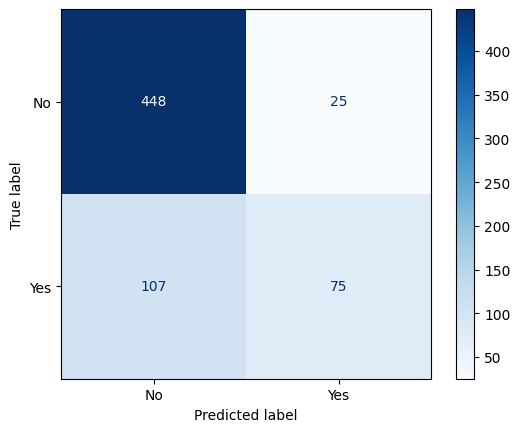

For K :  3


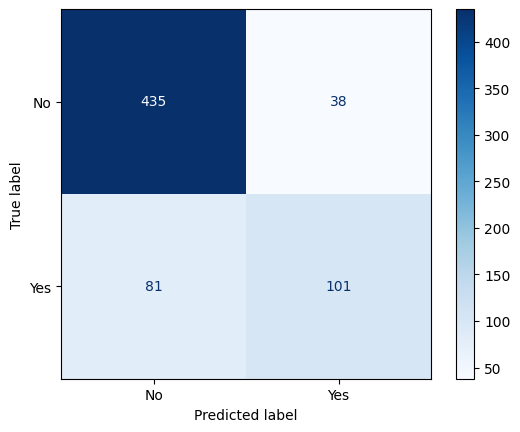

For K :  4


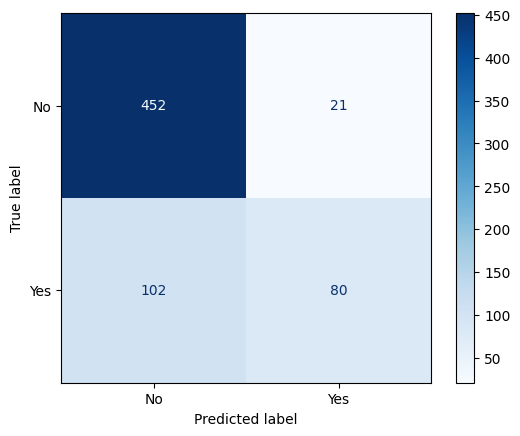

For K :  5


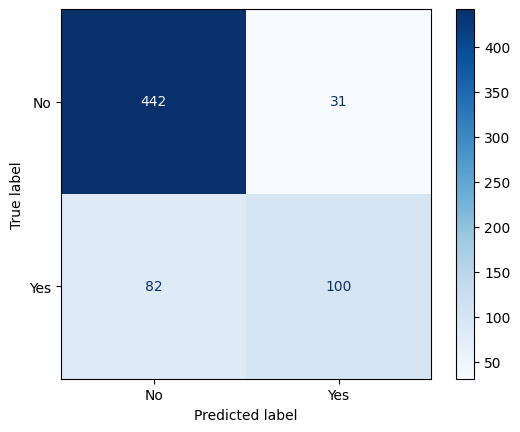

For K :  6


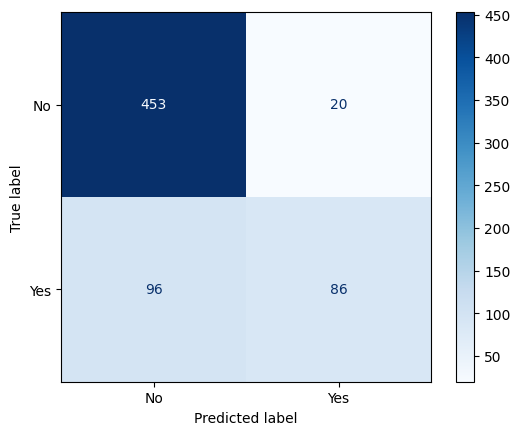

For K :  7


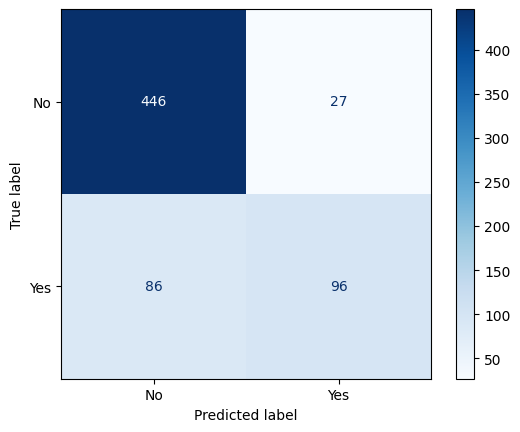

For K :  8


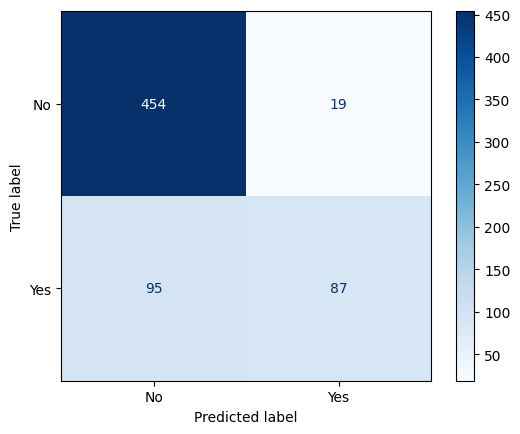

For K :  9


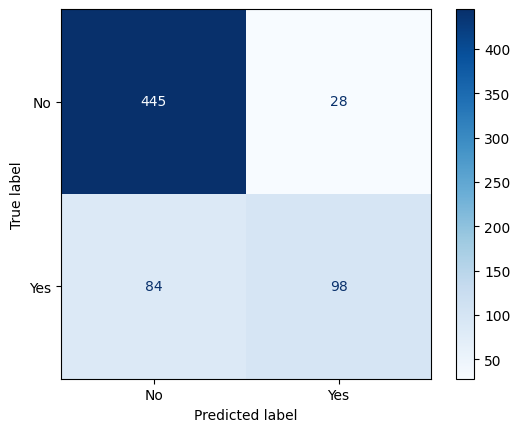

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

In [463]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
title = ""
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    predictions=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, predictions)
    std_acc[n-1]=np.std(predictions==y_test)/np.sqrt(predictions.shape[0])
    print("For K : ", n)
    plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

mean_acc

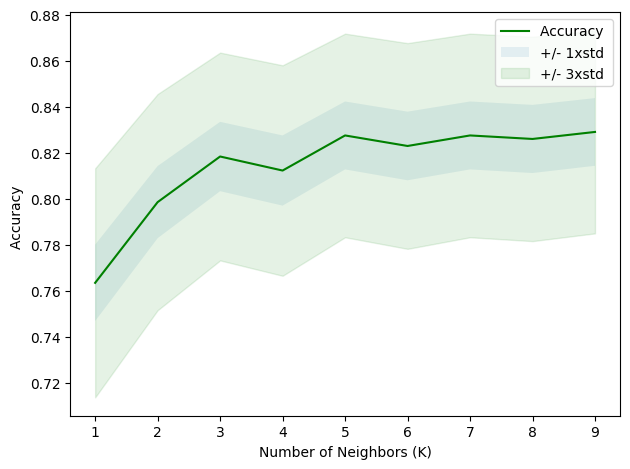

In [464]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [465]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8290076335877863 with k= 9


In [469]:
k = 9
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train,y_train)

predictions = KNN.predict(x_test)

confusion_matrix(y_test, predictions, labels=[1,0])

array([[ 98,  84],
       [ 28, 445]], dtype=int64)

In [470]:
KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

Report2 = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Score': [KNN_Accuracy_Score, KNN_JaccardIndex, KNN_F1_Score]
})

print(Report2)

           Metric     Score
0  Accuracy_Score  0.829008
1    JaccardIndex  0.466667
2        F1_Score  0.636364


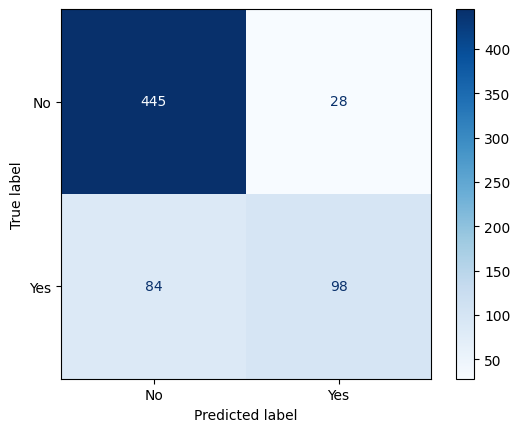

In [473]:
plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [293]:
#Enter Your Code, Execute and take the Screenshot

In [474]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(x_train, y_train)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [475]:
#Enter Your Code, Execute and take the Screenshot

In [476]:
predictions = Tree.predict(x_test) 

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [477]:
#Enter Your Code, Execute and take the Screenshot

In [478]:
Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

In [479]:
Report3 = pd.DataFrame({
    'Metric': ['Accuracy_Score', 'JaccardIndex', 'F1_Score'],
    'Score': [Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score]
})

print(Report3)

           Metric     Score
0  Accuracy_Score  0.804580
1    JaccardIndex  0.378641
2        F1_Score  0.549296


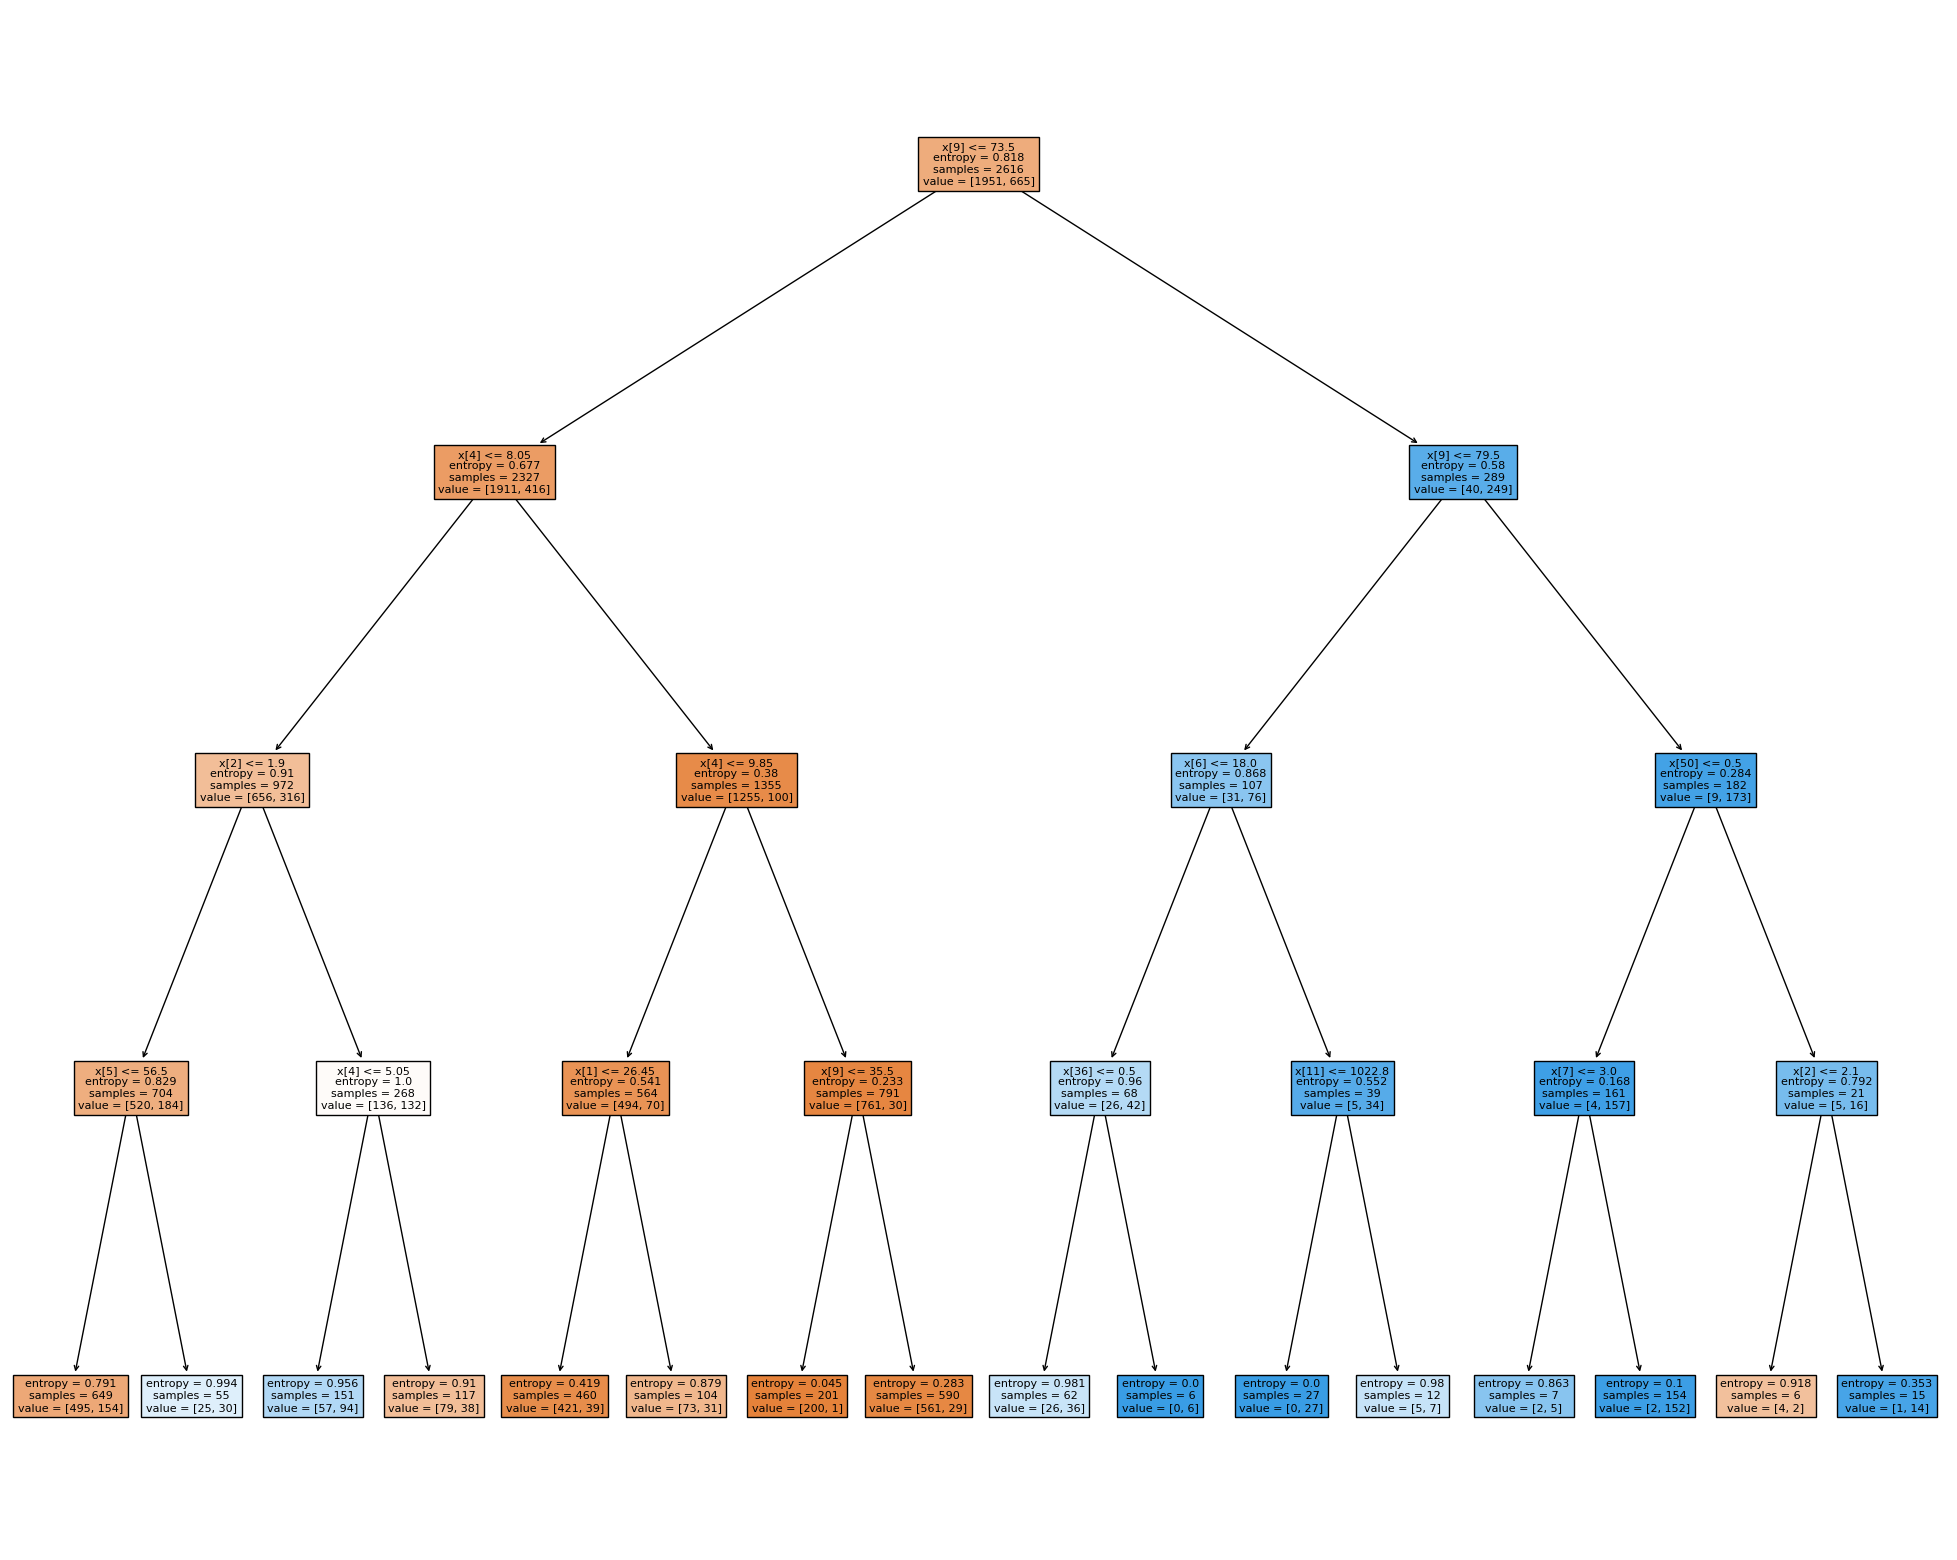

In [300]:
import sklearn.tree as tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Tree,filled=True)


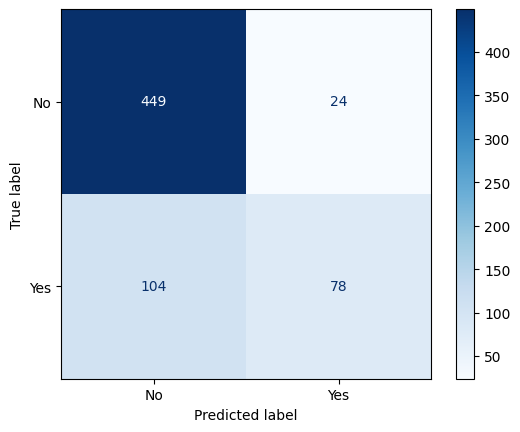

In [480]:
plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [301]:
#Enter Your Code, Execute and take the Screenshot

In [481]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size =0.2, random_state = 1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [482]:
#Enter Your Code, Execute and take the Screenshot

In [483]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [484]:
#Enter Your Code, Execute and take the Screenshot

In [485]:
predictions = LR.predict(x_test)

In [486]:
predict_proba = LR.predict_proba(x_test)

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [487]:
#Enter Your Code, Execute and take the Screenshot

In [488]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

LR_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')

LR_F1_Score = f1_score(y_test, predictions, average='weighted')

LR_Log_Loss = log_loss(y_test, LR.predict_proba(x_test))

print("Accuracy Score:", LR_Accuracy_Score)
print("Jaccard Index:", LR_JaccardIndex)
print("F1 Score:", LR_F1_Score)
print("Log Loss:", LR_Log_Loss)


Accuracy Score: 0.8274809160305343
Jaccard Index: 0.7079913151915388
F1 Score: 0.8205451234161274
Log Loss: 0.3800846892669132


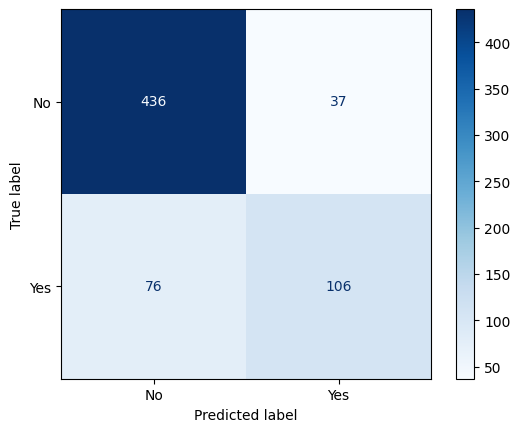

In [489]:
plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

In [492]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       473
         1.0       0.74      0.58      0.65       182

    accuracy                           0.83       655
   macro avg       0.80      0.75      0.77       655
weighted avg       0.82      0.83      0.82       655



### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [498]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train) 

SVC()

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [499]:
#Enter Your Code Below, Execute, and Save the Screenshot of the Final Output

In [500]:
predictions = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [501]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)

SVM_JaccardIndex = jaccard_score(y_test, predictions, average='weighted')

SVM_F1_Score = f1_score(y_test, predictions, average='weighted')

print("Accuracy Score:", SVM_Accuracy_Score)
print("Jaccard Index:", SVM_JaccardIndex)
print("F1 Score:", SVM_F1_Score)

Accuracy Score: 0.7221374045801526
Jaccard Index: 0.5214824310937591
F1 Score: 0.6056223268908018


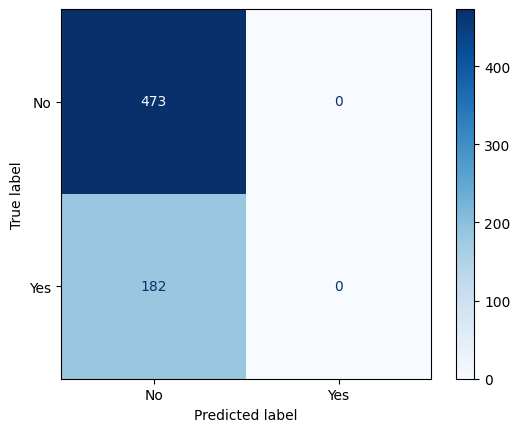

In [502]:
plot_confusion_matrix(y_test, predictions, 'Blues', ["No", "Yes"])

### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [509]:
# Create DataFrames for each model's metrics
LR_metrics = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [LR_Accuracy_Score],
    'Jaccard Index': [LR_JaccardIndex],
    'F1 Score': [LR_F1_Score],
    'Log Loss': [LR_Log_Loss]
})

KNN_metrics = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [KNN_Accuracy_Score],
    'Jaccard Index': [KNN_JaccardIndex],
    'F1 Score': [KNN_F1_Score],
    'Log Loss': ['N/A']
})

Tree_metrics = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [Tree_Accuracy_Score],
    'Jaccard Index': [Tree_JaccardIndex],
    'F1 Score': [Tree_F1_Score],
    'Log Loss': ['N/A']
})

SVM_metrics = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [SVM_Accuracy_Score],
    'Jaccard Index': [SVM_JaccardIndex],
    'F1 Score': [SVM_F1_Score],
    'Log Loss': ['N/A']
})

Report = pd.concat([LR_metrics, KNN_metrics, Tree_metrics, SVM_metrics], ignore_index=True)

print(Report)

                 Model  Accuracy  Jaccard Index  F1 Score  Log Loss
0  Logistic Regression  0.827481       0.707991  0.820545  0.380085
1                  KNN  0.829008       0.466667  0.636364       N/A
2        Decision Tree  0.804580       0.378641  0.549296       N/A
3                  SVM  0.722137       0.521482  0.605622       N/A


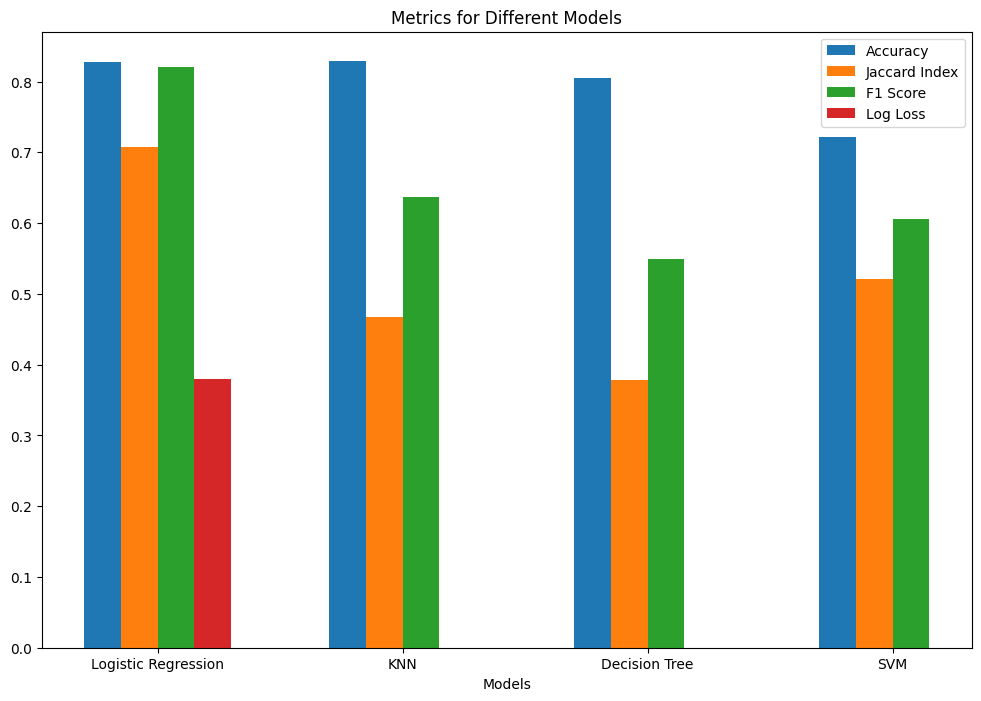

In [515]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 'Report' DataFrame containing your metrics
models = Report['Model']
# Convert columns to numeric data type
metrics = ['Accuracy', 'Jaccard Index', 'F1 Score', 'Log Loss']
Report[metrics] = Report[metrics].apply(pd.to_numeric, errors='coerce')
data = Report[metrics]

# Define the number of models and metrics
num_models = len(models)
num_metrics = len(metrics)

# Set the width of each bar
bar_width = 0.15

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create an array of positions for the bars
x = np.arange(num_models)

# Plot the bars for each metric
for i in range(num_metrics):
    ax.bar(x + i * bar_width, data.iloc[:, i], width=bar_width, label=metrics[i])

# Set the x-axis labels and their positions
ax.set_xticks(x + ((num_metrics - 1) * bar_width) / 2)
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_title('Metrics for Different Models')

# Add a legend
ax.legend()

plt.show()


<h2 id="Section_5">  How to submit </h2>

<p>Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

<p>This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.  


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
